
# Principal Component Analysis

1. Full form of PCA is Principal Component Analysis. It is popularly used for dimensionality reduction in continuous data, PCA rotates and projects data along the direction of increasing variance. The features with the maximum variance are the principal components.

2. PCA is an unsupervised algorithm

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
class PCA():
    def __init__(self,n_components):
        self.n_components=n_components
        self.eigenvectors=None
        self.eigenvalues=None
    
    def fit(self,X,y):
        n_features=X.shape[1]
                       
        m_overall=np.mean(X,axis=0)
        
        conv=(1/X.shape[0])*((X-m_overall).T@(X-m_overall))
                
        self.eigenvalues,self.eigenvectors = np.linalg.eig(conv)
        
        idx=np.argsort(abs(self.eigenvalues))[::-1]
        self.eigenvectors=self.eigenvectors.T
        
        self.W=self.eigenvectors[idx[:self.n_components]]
        
        
    def transform(self,X):
        # (ncompo,n_features) X (n_features,kfeatures)
        return X@self.W.T

In [8]:
model=PCA(2)

from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [9]:
iris=pd.read_csv("iris.csv")
X=pd.DataFrame(std.fit_transform(iris.iloc[:,1:-1]))
y=iris.iloc[:,-1]
model.fit(X,y)

df=model.transform(X)
df['class']=y

<AxesSubplot: xlabel='0', ylabel='1'>

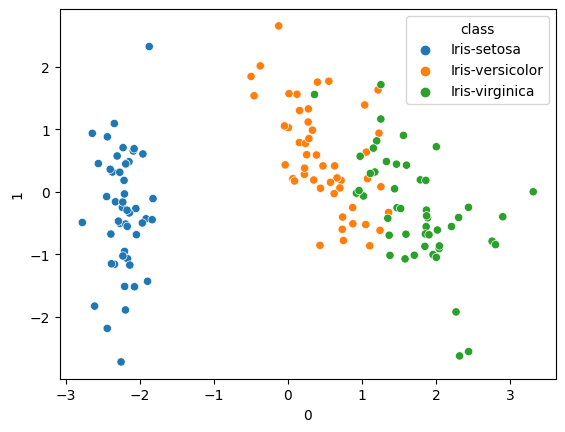

In [10]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue=df['class'],data=df)